In [88]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [89]:
pdata = pd.read_csv('data-final.csv', delimiter='\t')
#pdata = pd.read_csv('data-small.csv')
pdata_len = 1000

# Removing unnecessary columns
keep_columns = []
for x in range (0, 50):
    keep_columns.append(x)
keep_columns.append(106)
keep_columns.append(107)
columns_to_keep = [x for x in range(pdata.shape[1]) if x in keep_columns]
pdata = pdata.iloc[:, columns_to_keep]

# Add columns for averages [EXT_Avg, EST_Avg, AGR_Avg, CSN_Avg, OPN_Avg]
pdata["EXT_Avg"] = 0
pdata["EST_Avg"] = 0
pdata["AGR_Avg"] = 0
pdata["CSN_Avg"] = 0
pdata["OPN_Avg"] = 0

print (pdata.head(20))



    EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN8  \
0    4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   3.0   
1    3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   2.0   
2    2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   3.0   
3    2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   4.0   
4    3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   3.0   
5    3.0   3.0   4.0   2.0   4.0   2.0   2.0   3.0   3.0    4.0  ...   4.0   
6    4.0   3.0   4.0   3.0   3.0   3.0   5.0   3.0   4.0    3.0  ...   5.0   
7    3.0   1.0   5.0   2.0   5.0   2.0   5.0   2.0   3.0    2.0  ...   3.0   
8    2.0   2.0   3.0   3.0   4.0   2.0   2.0   2.0   4.0    4.0  ...   2.0   
9    1.0   5.0   3.0   5.0   2.0   3.0   2.0   4.0   5.0    4.0  ...   3.0   
10   3.0   3.0   2.0   3.0   3.0   2.0   4.0   3.0   3.0    5.0  ...   5.0   
11   3.0   1.0   5.0   3.0   5.0   1.0   5.0   5.0   5.0    3.0 

In [90]:
# Create a dataframe to keep track of country averages for each of the personality traits
coun_d = pd.DataFrame()
coun_d['Country'] = ""
coun_d = coun_d.set_index('Country')
coun_d["NumberOfEntries"] = 0
coun_d["EXT_Sum"] = 0
coun_d["EST_Sum"] = 0
coun_d["AGR_Sum"] = 0
coun_d["CSN_Sum"] = 0
coun_d["OPN_Sum"] = 0

coun_d["EXT_Var"] = 0
coun_d["EST_Var"] = 0
coun_d["AGR_Var"] = 0
coun_d["CSN_Var"] = 0
coun_d["OPN_Var"] = 0

# For each row, we need to compute the mean for each of the big 5 personalities
i = 0
j = 0
country_index = {}
while i < pdata_len:
    # Removing unviable entries
    if pdata.iloc[i, 50] != 1 or pdata.iloc[i, 51] == 'NONE':
        pdata = pdata.drop(pdata.index[i])
    # Updating the mean for each entry in the original dataframe
    else:
        pdata.iloc[i, 52]= float(statistics.mean(pdata.iloc[i, 0:10])) # Ext_Avg
        pdata.iloc[i, 53]= float(statistics.mean(pdata.iloc[i, 10:20]))# Est_Avg
        pdata.iloc[i, 54]= float(statistics.mean(pdata.iloc[i, 20:30]))# Agr_Avg
        pdata.iloc[i, 55]= float(statistics.mean(pdata.iloc[i, 30:40]))# CSN_Avg
        pdata.iloc[i, 56]= float(statistics.mean(pdata.iloc[i, 40:50]))# Opn_Avg
        
        # Adding data to coun_d dataframe based on country (if country does not already exist in df)
        temp_country = pdata.iloc[i, 51]
        if (temp_country not in country_index and temp_country != 'None'):
            temp_row = pd.DataFrame({"Country":[pdata.iloc[i, 51]], "NumberOfEntries": [0], 'EXT_Sum': [0], 'EST_Sum':[0],
                        'AGR_Sum':[0], 'CSN_Sum':[0], 'OPN_Sum': [0], 'EXT_Var':[0],'EST_Var':[0],
                        'AGR_Var':[0], 'CSN_Var':[0], 'OPN_Var':[0]})
            coun_d = pd.concat([coun_d, temp_row], ignore_index = True)
            country_index[temp_country] = j
            j += 1

        # Adding data to the coun_d dataframe based on mean data
        coun_d.at[country_index[temp_country], "NumberOfEntries"] += 1
        coun_d.at[country_index[temp_country], "EXT_Sum"] += float(pdata.iloc[i, 52])
        coun_d.at[country_index[temp_country], "EST_Sum"] += float(pdata.iloc[i, 53])
        coun_d.at[country_index[temp_country], "AGR_Sum"] += float(pdata.iloc[i, 54])
        coun_d.at[country_index[temp_country], "CSN_Sum"] += float(pdata.iloc[i, 55])
        coun_d.at[country_index[temp_country], "OPN_Sum"] += float(pdata.iloc[i, 56])
        

    i += 1

print(coun_d)

    NumberOfEntries  EXT_Sum  EST_Sum  AGR_Sum  CSN_Sum  OPN_Sum  EXT_Var  \
0               112    329.1    352.4    344.1    337.9    365.9        0   
1                 8     24.6     23.8     25.6     24.4     23.7        0   
2               297    908.7    879.1    933.5    926.6    956.7        0   
3                 7     21.4     19.2     21.0     21.0     22.0        0   
4                 1      3.1      3.5      2.9      3.2      3.8        0   
..              ...      ...      ...      ...      ...      ...      ...   
57                1      3.0      3.5      2.7      2.6      3.8        0   
58                1      2.8      4.6      3.4      3.2      3.5        0   
59                1      3.5      3.4      3.3      2.7      2.7        0   
60                1      3.7      2.6      3.3      2.7      2.9        0   
61                1      2.7      4.3      3.6      3.4      3.4        0   

    EST_Var  AGR_Var  CSN_Var  OPN_Var Country  
0         0        0      

In [91]:
# Actually calculating mean test scores by country
coun_d["EXT_Mean"] = 0
coun_d["EST_Mean"] = 0
coun_d["AGR_Mean"] = 0
coun_d["CSN_Mean"] = 0
coun_d["OPN_Mean"] = 0

for i in range (0, len(coun_d)):
    coun_d.at[i, "EXT_Mean"] = float(coun_d.at[i, "EXT_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "EST_Mean"] = float(coun_d.at[i, "EST_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "AGR_Mean"] = float(coun_d.at[i, "AGR_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "CSN_Mean"] = float(coun_d.at[i, "CSN_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "OPN_Mean"] = float(coun_d.at[i, "OPN_Sum"] / coun_d.at[i, "NumberOfEntries"])


In [106]:
# This Loop calculates and stores the sum of (entries - mean)^2 for each country in the variance columns
for i in range(0, pdata_len):
    temp_country = pdata.iloc[i, 51]
    if temp_country in country_index:
        coun_d.iloc[country_index[temp_country], 6] += (pdata.iloc[i, 52] - coun_d.iloc[country_index[temp_country], 13])**2
        coun_d.iloc[country_index[temp_country], 7] += (pdata.iloc[i, 53] - coun_d.iloc[country_index[temp_country], 14])**2
        coun_d.iloc[country_index[temp_country], 8] += (pdata.iloc[i, 54] - coun_d.iloc[country_index[temp_country], 15])**2
        coun_d.iloc[country_index[temp_country], 9] += (pdata.iloc[i, 55] - coun_d.iloc[country_index[temp_country], 16])**2
        coun_d.iloc[country_index[temp_country], 10] += (pdata.iloc[i, 56] - coun_d.iloc[country_index[temp_country], 17])**2

coun_d["EXT_Std"] = 0
coun_d["EST_Std"] = 0
coun_d["AGR_Std"] = 0
coun_d["CSN_Std"] = 0
coun_d["OPN_Std"] = 0

print(coun_d.head(10))

# This loop calculates and stores variance, then standard deviation
j = 0
while j < len(coun_d):
    coun_d.iloc[j, 6] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "EXT_Std"] = math.sqrt(coun_d.iloc[j, 6])
    coun_d.iloc[j, 7] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "EST_Std"] = math.sqrt(coun_d.iloc[j, 7])
    coun_d.iloc[j, 8] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "AGR_Std"] = math.sqrt(coun_d.iloc[j, 8])
    coun_d.iloc[j, 9] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "CSN_Std"] = math.sqrt(coun_d.iloc[j, 9])
    coun_d.iloc[j, 10] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "OPN_Std"] = math.sqrt(coun_d.iloc[j, 10])
    j += 1

print(coun_d.head(10))

   NumberOfEntries  EXT_Sum  EST_Sum  AGR_Sum  CSN_Sum  OPN_Sum      EXT_Var  \
0              112    329.1    352.4    344.1    337.9    365.9   394.353640   
1                8     24.6     23.8     25.6     24.4     23.7    41.107104   
2              297    908.7    879.1    933.5    926.6    956.7  1330.401249   
3                7     21.4     19.2     21.0     21.0     22.0     1.596002   
4                1      3.1      3.5      2.9      3.2      3.8     0.640000   
5                9     27.9     29.8     31.1     30.2     28.1     2.745831   
6               15     46.2     45.0     46.9     45.9     50.0    96.898086   
7               22     65.4     65.7     68.6     68.0     72.8    39.454420   
8               15     45.9     47.2     53.2     44.4     47.7    43.429190   
9               63    192.7    184.0    199.3    204.1    211.2    95.612869   

       EST_Var      AGR_Var      CSN_Var  ...  EXT_Mean  EST_Mean  AGR_Mean  \
0   398.993506   354.734481   427.387951

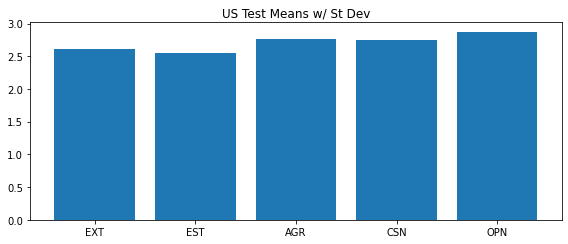

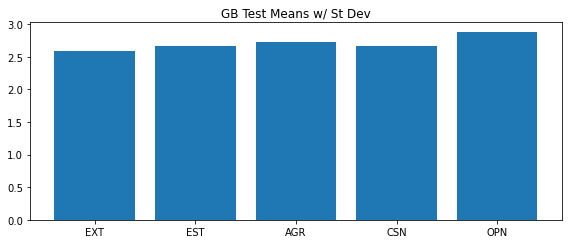

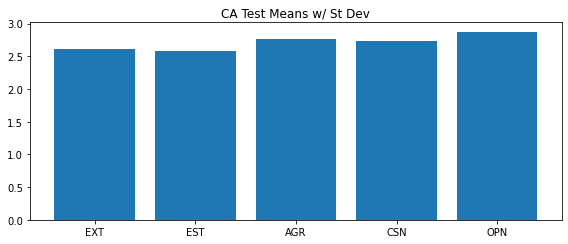

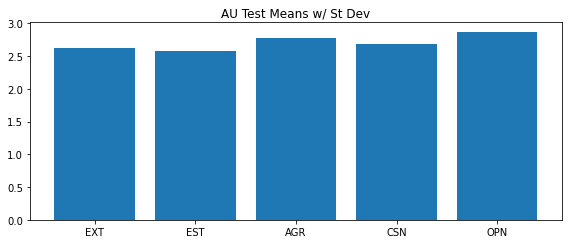

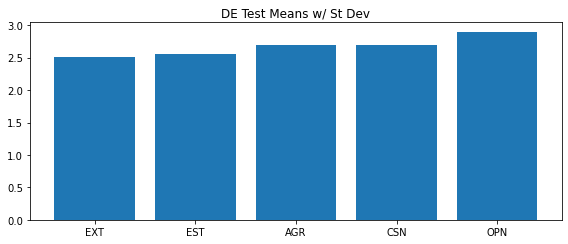

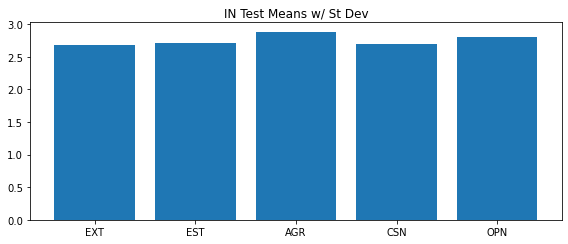

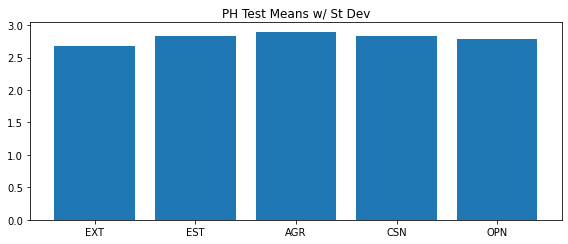

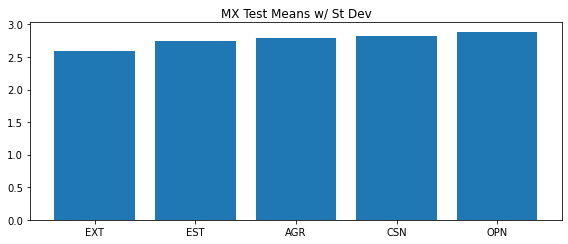

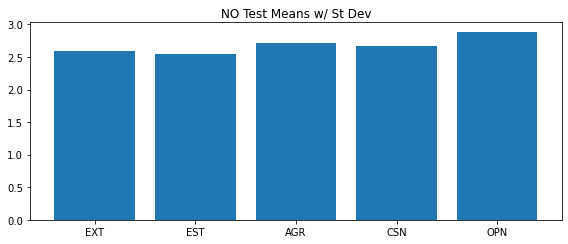

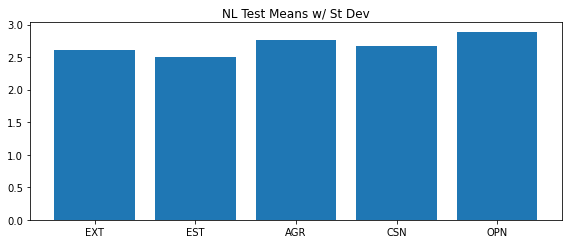

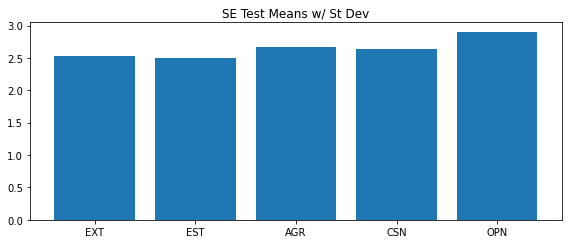

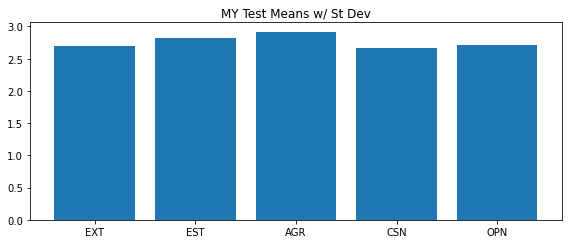

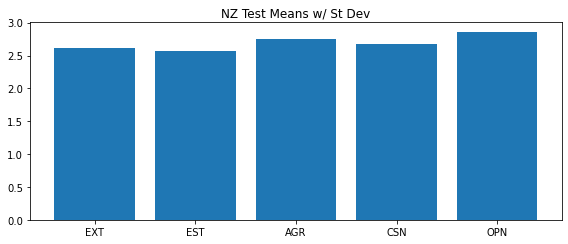

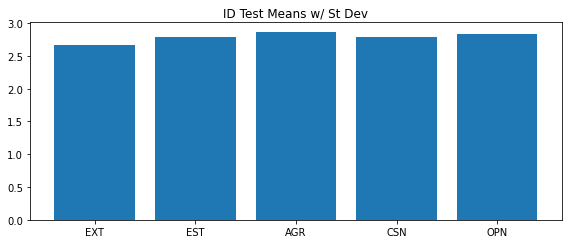

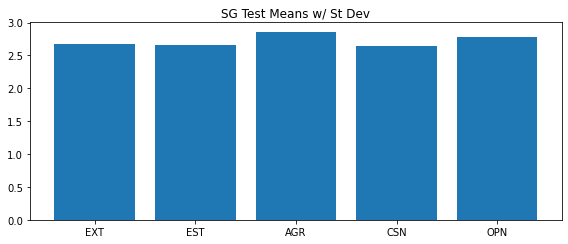

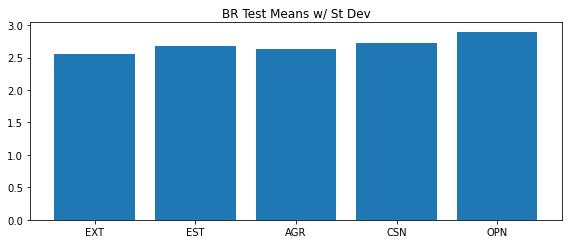

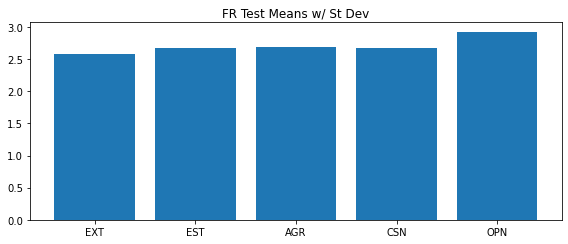

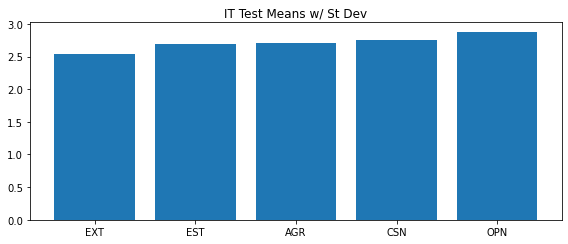

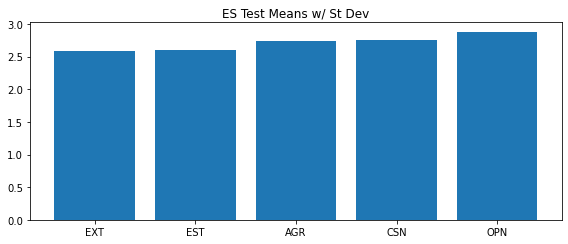

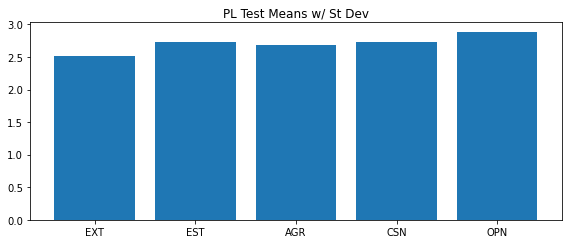

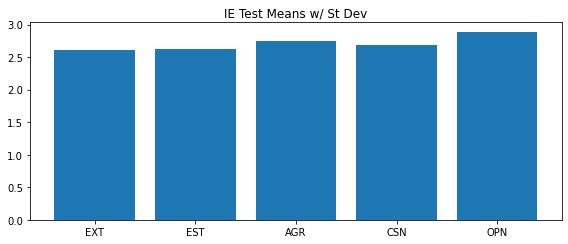

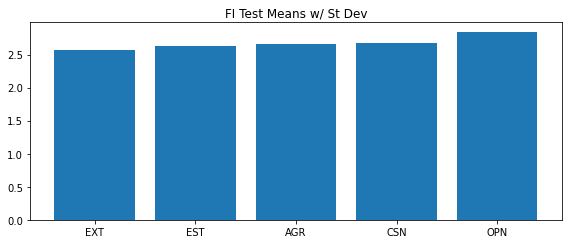

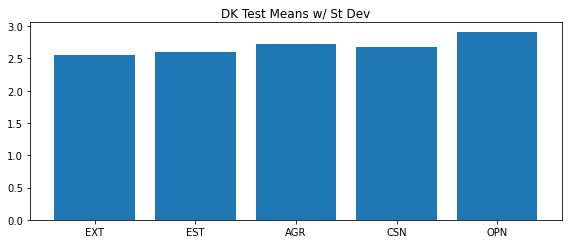

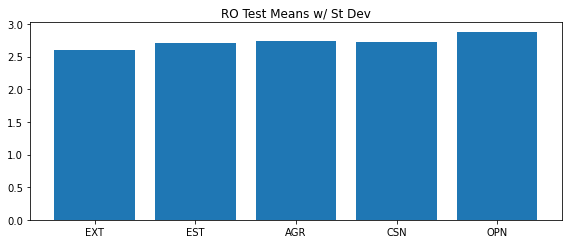

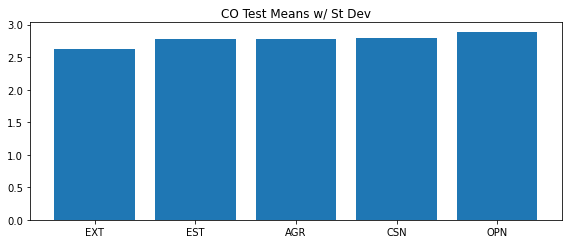

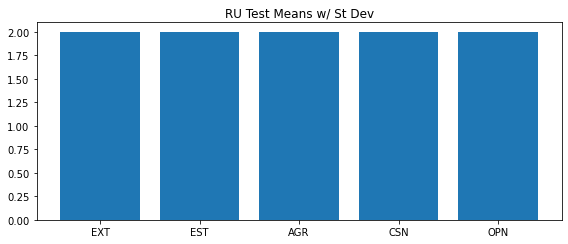

In [148]:
# Plot the averages for each country
labels = ['EXT','EST', 'AGR', 'CSN', 'OPN']

for i in range (len(coun_d)):
    if coun_d.at[i, "NumberOfEntries"] > 1:
        hites = [coun_d.at[i, "EXT_Mean"], 
                coun_d.at[i, "EST_Mean"], 
                coun_d.at[i, "AGR_Mean"], 
                coun_d.at[i, "CSN_Mean"], 
                coun_d.at[i, "OPN_Mean"]]
        error = [coun_d.at[i, "EXT_Std"], 
                coun_d.at[i, "EST_Std"],
                coun_d.at[i, "AGR_Std"],
                coun_d.at[i, "CSN_Std"],
                coun_d.at[i, "OPN_Std"]]
        plt.bar(labels, hites, yerr=error)
        plt.title(coun_d.at[i, "Country"] + ' Test Means w/ St Dev')
        plt.show()


   Countries  Entries
0         US   300604
1         GB    43441
2         CA    38353
3         AU    30407
4         DE    10898
5         IN     9850
6         PH     9474
7         MX     8311
8         NO     7312
9         NL     6913
10        SE     6530
11        MY     6330
12        NZ     5754
13        ID     4930
14        SG     4802
15        BR     4767
16        FR     4499
17        IT     3814
18        ES     3724
19        PL     3622
20        IE     3503
21        FI     3412
22        DK     3349
23        RO     2909
24        CO     2742
25        RU     2539


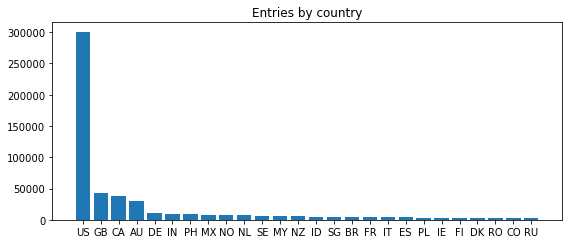

In [147]:
# Entries by country
coun_d = pd.read_csv('coun_d.csv')
coun_d.sort_values(["NumberOfEntries"],axis=0,
                    ascending=[False], 
                    inplace=True)

graph2_labels =[]
graph2_vals = []

for i in range (len(coun_d)):
    if coun_d.at[i, "NumberOfEntries"] >= 2500:
        graph2_labels.append(coun_d.at[i, "Country"])
        graph2_vals.append(coun_d.at[i, "NumberOfEntries"])
    
temp_df = pd.DataFrame(dict(Countries = graph2_labels, Entries = graph2_vals))
temp_df = temp_df.sort_values('Entries', ascending = [False])
print(temp_df)

plt.rcParams["figure.figsize"] = [8.0, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.bar('Countries', 'Entries', data=temp_df) 
plt.title('Entries by country')
plt.show()

In [149]:
print('The mean values for each personality trait')
print('The mean of EXT means is', coun_d['EXT_Mean'].mean())
print('The mean of EST means is', coun_d['EST_Mean'].mean())
print('The mean of AGR means is', coun_d['AGR_Mean'].mean())
print('The mean of CSN means is', coun_d['CSN_Mean'].mean())
print('The mean of OPN means is', coun_d['OPN_Mean'].mean())
print('The mean of EXT standard deviations is', coun_d['EXT_Std'].mean())
print('The mean of EST standard deviations is', coun_d['EST_Std'].mean())
print('The mean of AGR standard deviations is', coun_d['AGR_Std'].mean())
print('The mean of CSN standard deviations is', coun_d['CSN_Std'].mean())
print('The mean of OPN standard deviations is', coun_d['OPN_Std'].mean())

The mean values for each personality trait
The mean of EXT means is 2.145506991709091
The mean of EST means is 2.1241609439954545
The mean of AGR means is 2.2134002930772727
The mean of CSN means is 2.1674635503863637
The mean of OPN means is 2.302787364590909
The mean of EXT standard deviations is 8.613553727272727e-07
The mean of EST standard deviations is 1.3470349545454544e-06
The mean of AGR standard deviations is 1.2470614954545453e-06
The mean of CSN standard deviations is 1.0673515090909092e-06
The mean of OPN standard deviations is 6.875939e-05
